In [28]:
!pip install pandas_datareader 
!pip install yfinance
!pip install seaborn
!pip install pandas_datareader
!pip install yfinance

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

# Set up visualization styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Override pandas_datareader's get_data_yahoo method with yfinance's implementation
yf.pdr_override = lambda: None

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Dictionary to hold the data frames for each stock
stock_data = {}

for stock, name in zip(tech_list, company_name):
    # Download the stock data and store it in the dictionary
    stock_data[stock] = yf.download(stock, start, end)
    # Add the company name to the data frame
    stock_data[stock]["company_name"] = name

# Concatenate all the individual company data frames into one large data frame
df = pd.concat(stock_data.values(), axis=0)

df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-09-24,194.270004,195.369995,190.130005,193.960007,193.960007,43478900,AMAZON
2024-09-25,193.750000,193.949997,192.160004,192.529999,192.529999,26391100,AMAZON
2024-09-26,194.309998,194.529999,189.539993,191.160004,191.160004,36334900,AMAZON
2024-09-27,190.679993,190.899994,187.339996,187.970001,187.970001,36002300,AMAZON
2024-09-30,187.139999,188.490005,184.649994,186.330002,186.330002,41583900,AMAZON
2024-10-01,184.899994,186.190002,183.449997,185.130005,185.130005,36044900,AMAZON
2024-10-02,184.440002,186.600006,184.039993,184.759995,184.759995,23704100,AMAZON
2024-10-03,183.050003,183.440002,180.880005,181.960007,181.960007,30204300,AMAZON
2024-10-04,185.750000,187.600006,183.600006,186.509995,186.509995,40890300,AMAZON


In [30]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,243.000000,233.000000,203.000000,251.000000
mean,193.745952,195.548611,192.111428,193.943889,193.489751,5.946187e+07,193.264000,193.005386,191.957366,0.001268
std,19.960665,20.184988,19.519437,19.862240,20.051685,2.967765e+07,19.330476,18.714791,16.205666,0.013989
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07,167.883702,168.948523,171.939701,-0.048167
25%,176.582497,178.607498,175.392506,178.185001,177.277855,4.459228e+07,176.535357,176.331454,180.375216,-0.006822
50%,189.695000,190.854996,188.590004,189.715004,189.032684,5.277105e+07,188.778648,188.063283,187.294867,0.001579
75%,213.489998,216.240005,211.375004,213.507500,213.260658,6.502268e+07,212.483054,212.404144,204.614108,0.008042
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.186799e+08,229.355522,224.947126,222.954626,0.072649


In [31]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-09-28 to 2024-09-27
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            252 non-null    float64
 1   High            252 non-null    float64
 2   Low             252 non-null    float64
 3   Close           252 non-null    float64
 4   Adj Close       252 non-null    float64
 5   Volume          252 non-null    int64  
 6   company_name    252 non-null    object 
 7   MA for 10 days  243 non-null    float64
 8   MA for 20 days  233 non-null    float64
 9   MA for 50 days  203 non-null    float64
 10  Daily Return    251 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 23.6+ KB


ValueError: bottom cannot be >= top

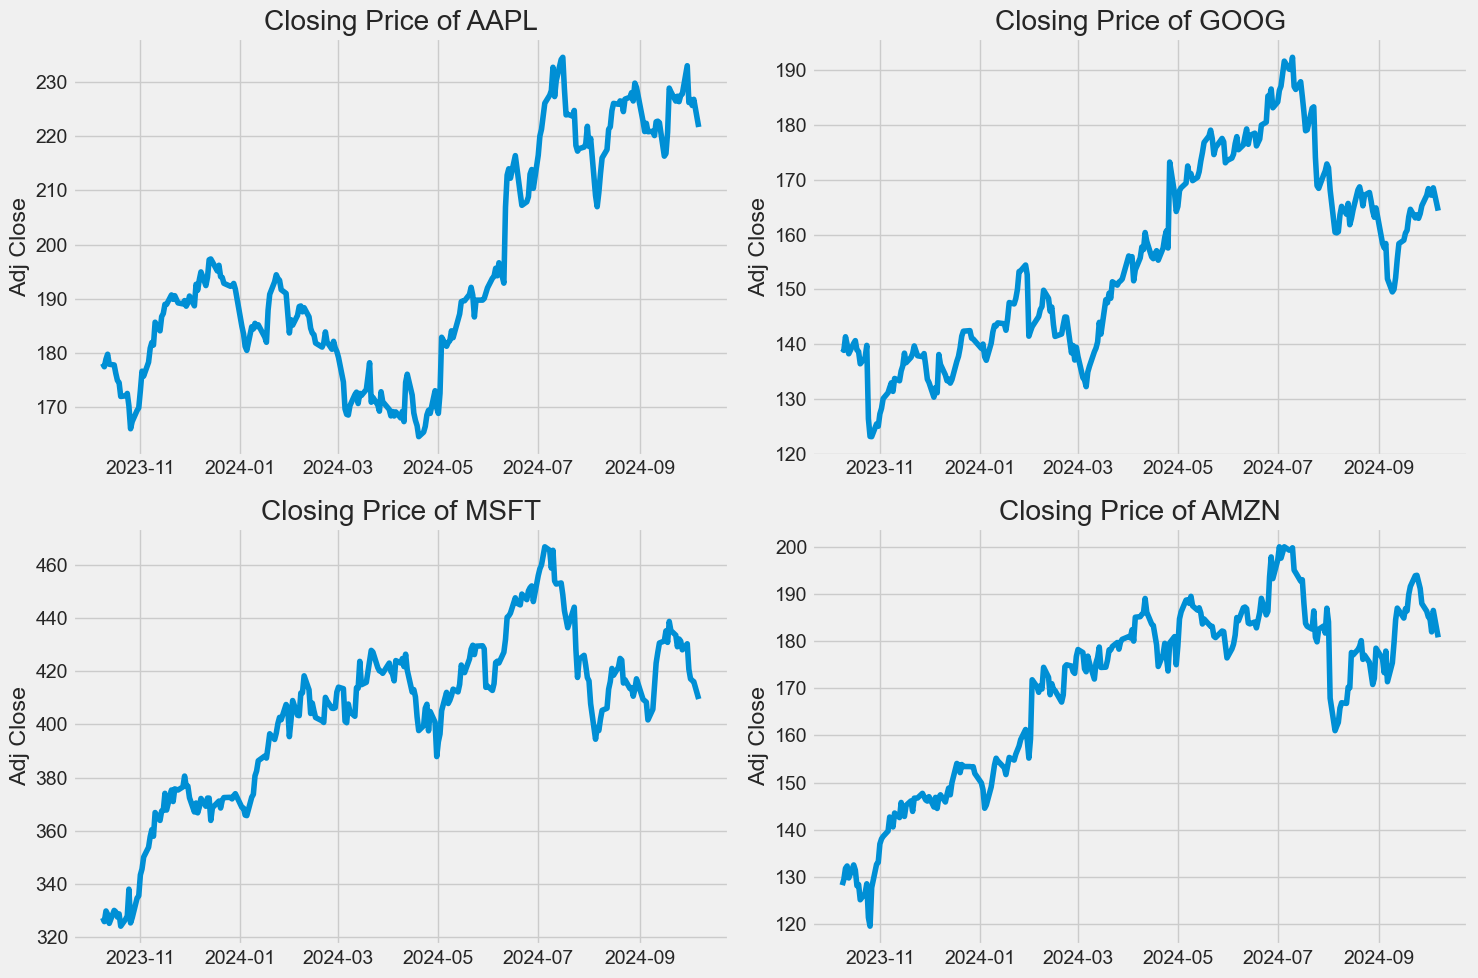

In [36]:
# Set up the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (stock, data) in enumerate(stock_data.items()):
    # Plot the adjusted close price
    axs[i].plot(data['Adj Close'])
    axs[i].set_title(f"Closing Price of {stock}")
    axs[i].set_ylabel('Adj Close')
    axs[i].set_xlabel(None)

# Adjust the layout
fig.tight_layout()
plt.subplots_adjust(top=1.1, bottom=1.1)
plt.show()

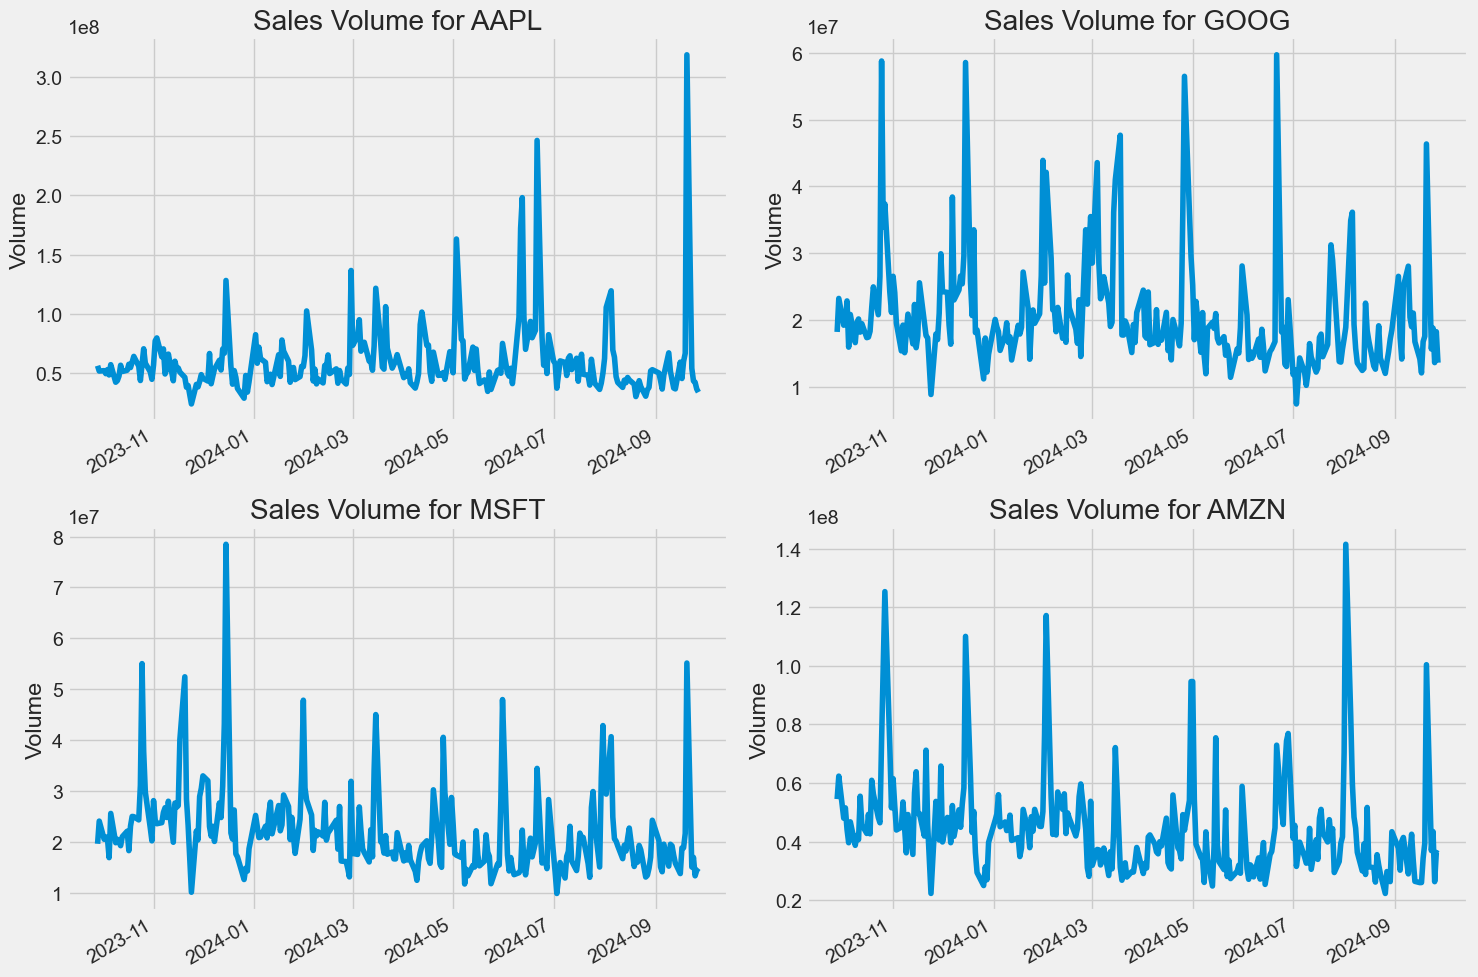

In [37]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()


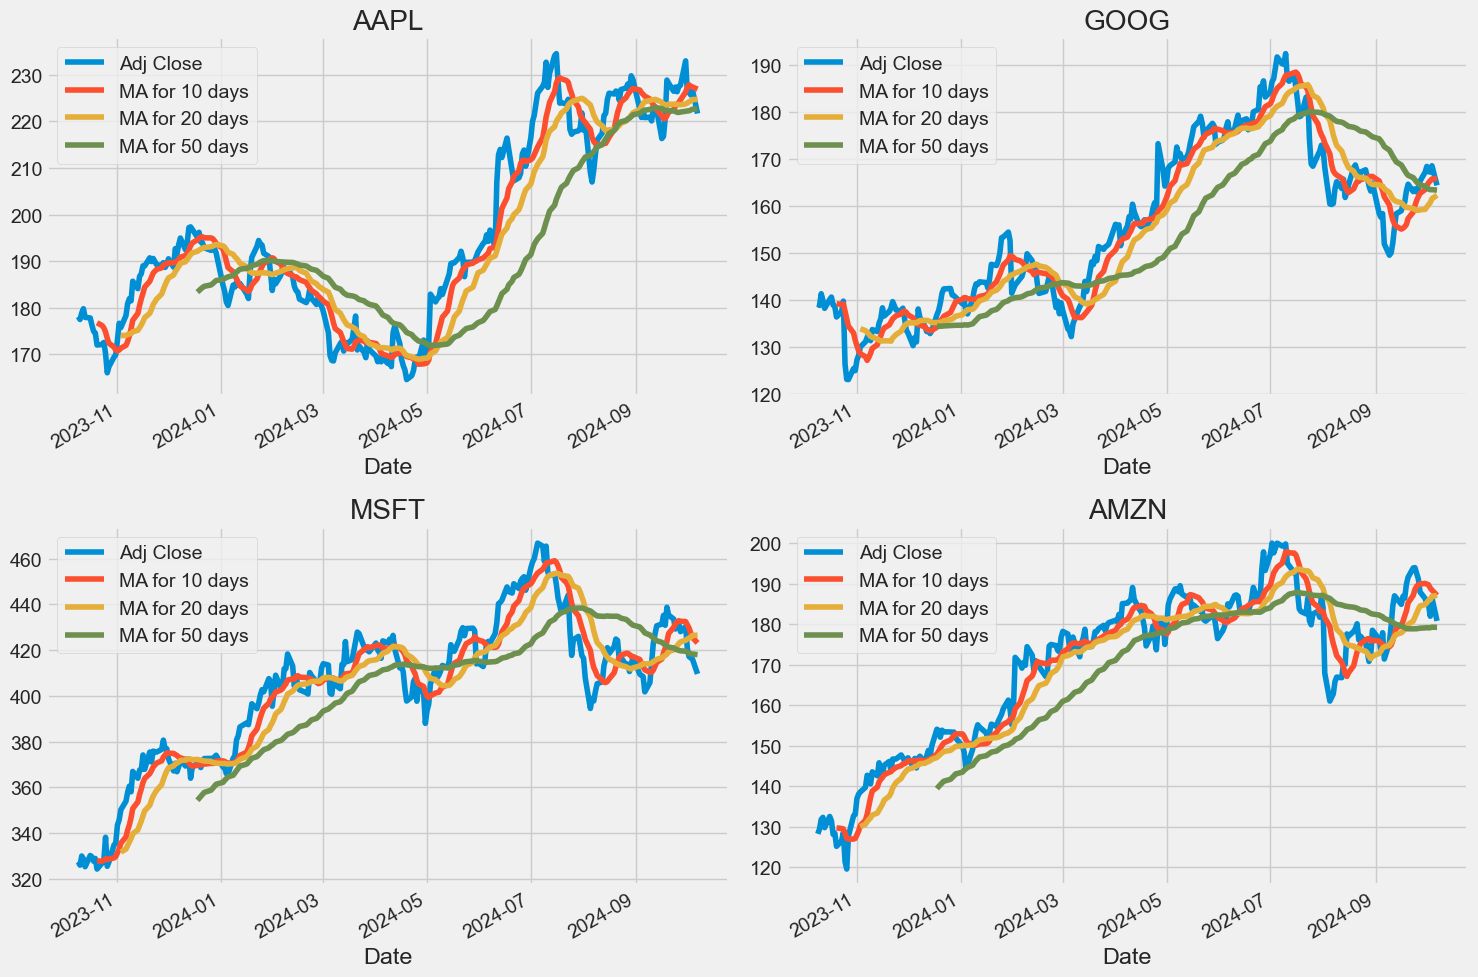

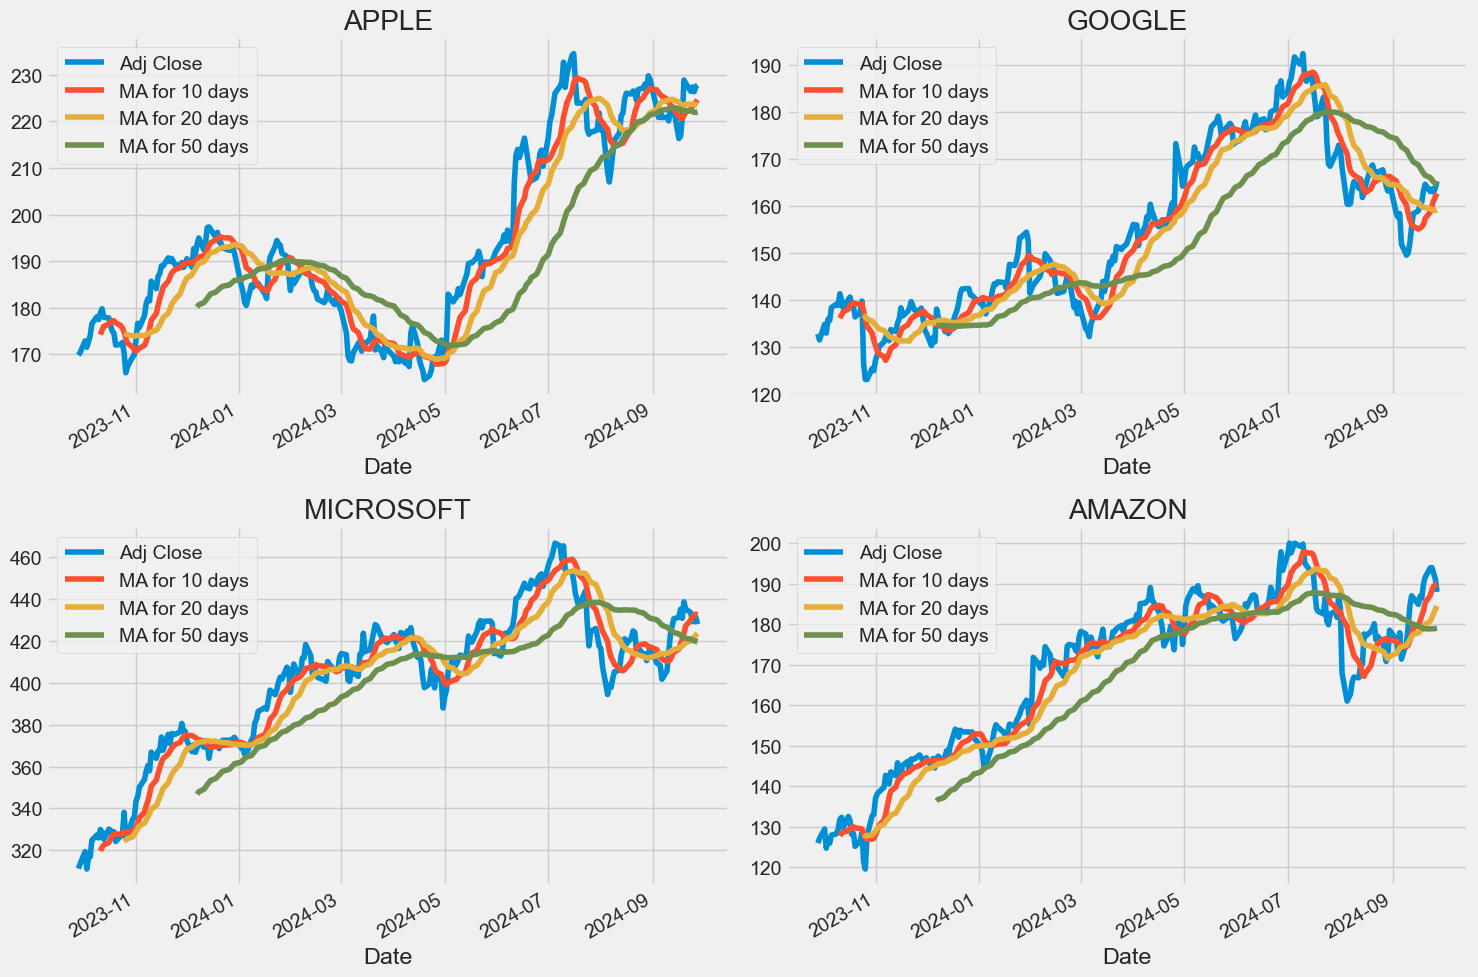

In [40]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for stock, data in stock_data.items():
        column_name = f"MA for {ma} days"
        data[column_name] = data['Adj Close'].rolling(ma).mean()

# Set up the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (stock, data) in enumerate(stock_data.items()):
    # Plot the adjusted close price and moving averages
    data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axs[i])
    axs[i].set_title(stock)

# Adjust the layout
fig.tight_layout()
plt.show()

for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

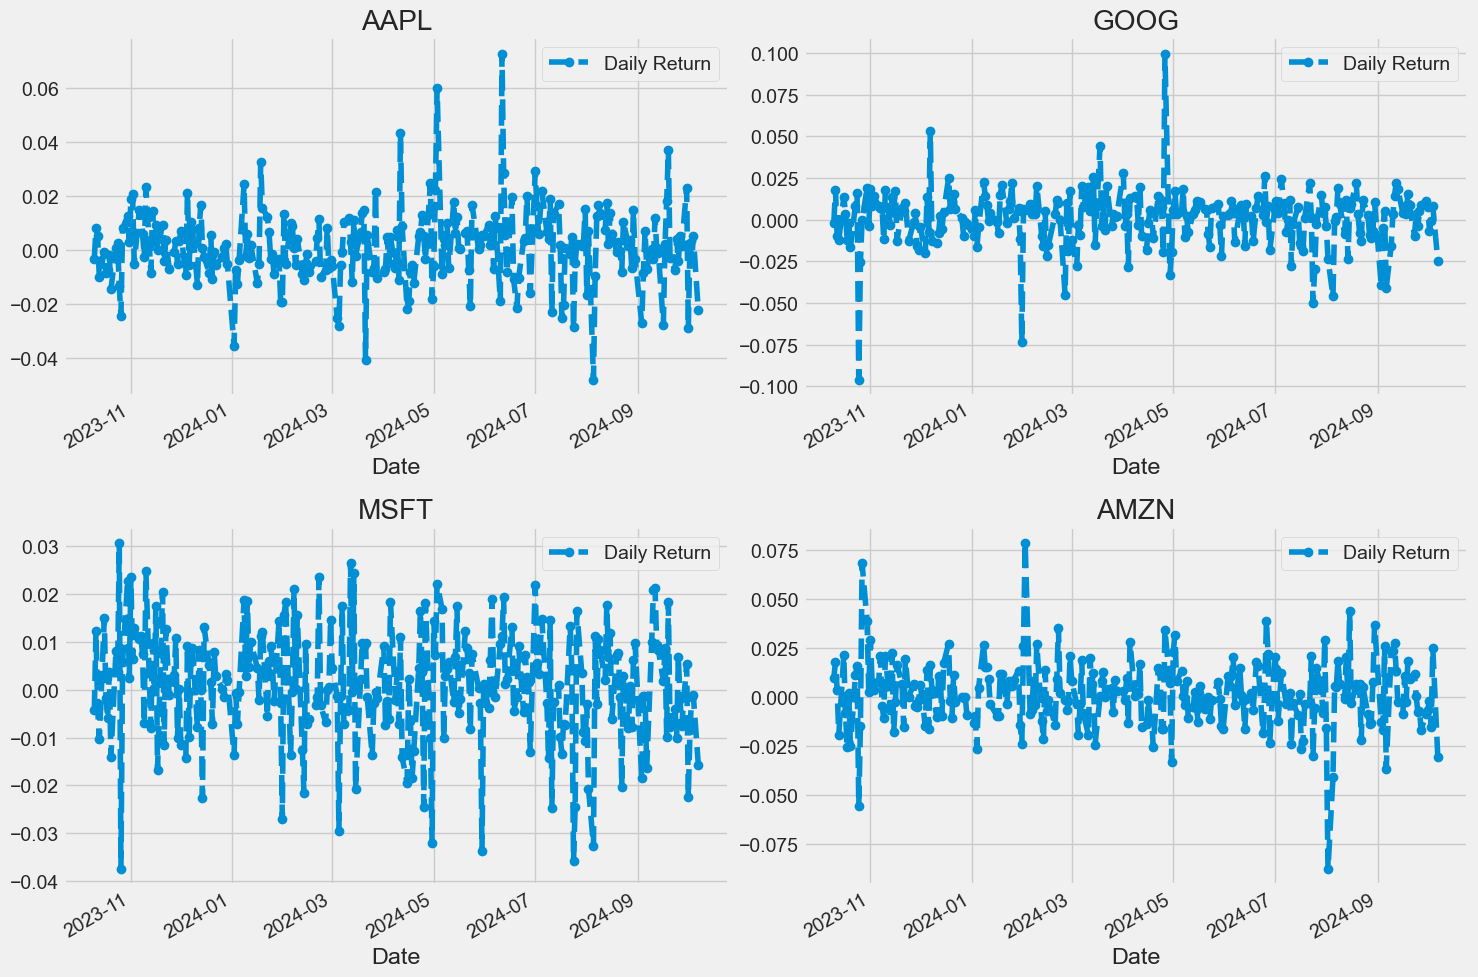

In [41]:
# Calculate the daily return for each stock
for stock, data in stock_data.items():
    data['Daily Return'] = data['Adj Close'].pct_change()

# Set up the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (stock, data) in enumerate(stock_data.items()):
    # Plot the daily return
    data['Daily Return'].plot(ax=axs[i], legend=True, linestyle='--', marker='o')
    axs[i].set_title(stock)

# Adjust the layout
fig.tight_layout()
plt.show()

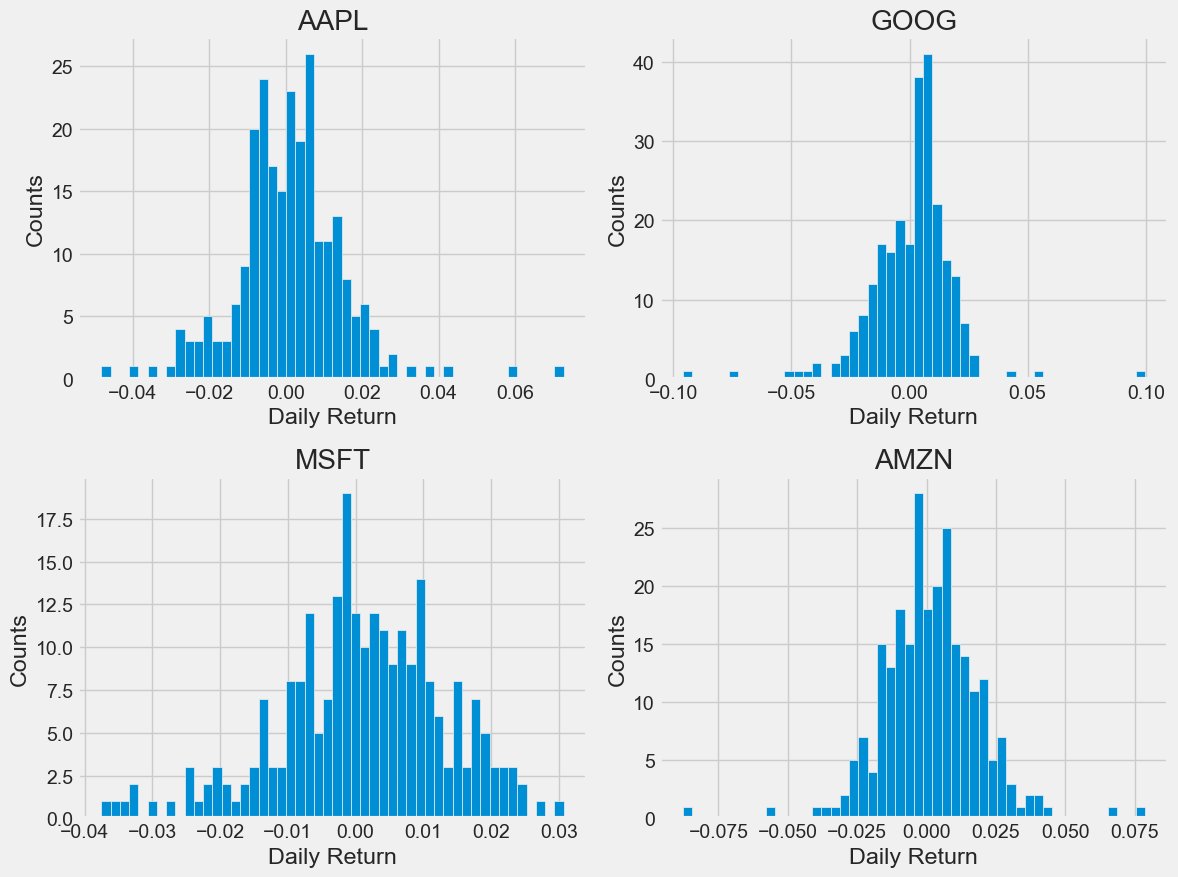

In [42]:
# Set up the figure
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
axs = axs.ravel()

for i, (stock, data) in enumerate(stock_data.items()):
    # Plot the histogram of daily returns
    data['Daily Return'].hist(bins=50, ax=axs[i])
    axs[i].set_xlabel('Daily Return')
    axs[i].set_ylabel('Counts')
    axs[i].set_title(stock)

# Adjust the layout
fig.tight_layout()
plt.show()